<a href="https://colab.research.google.com/github/nikukaushik001/Machine-Learning-Projects/blob/main/Object_Detection_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install kaggle

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#dataset api
!kaggle competitions download -c cifar-10

 94% 671M/715M [00:06<00:00, 79.6MB/s]
100% 715M/715M [00:06<00:00, 111MB/s] 


In [10]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [11]:
#Extracting current file
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done Dataset is extracted')

Done Dataset is extracted


In [12]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [13]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.6/413.6 kB 20.1 MB/s eta 0:00:00


In [14]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r') # r means reading this file
archive.extractall(path='/content/train')
archive.close()

In [15]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


# Importing the dependencies


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split

In [17]:
filenames = os.listdir("/content/train/train")

In [18]:
type(filenames)

list

In [19]:
len(filenames)

50000

In [20]:
print(filenames[0:5])
print(filenames[-5:])

['27504.png', '45172.png', '8292.png', '33112.png', '36576.png']
['48636.png', '25494.png', '15859.png', '5751.png', '21187.png']


# Label Processing

In [21]:
labels_df = pd.read_csv("/content/trainLabels.csv")

In [22]:
labels_df.shape

(50000, 2)

In [23]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [24]:
labels_df[labels_df["id"] == 4769]

,id,label
4768,4769,truck


In [25]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [26]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [27]:
 labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [28]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [29]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [30]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


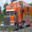

In [31]:
# Displaying sample images
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/train/4769.png')
cv2_imshow(img)

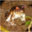

In [32]:
# Displaying sample images
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/train/1.png')
cv2_imshow(img)

In [33]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [34]:
id_list = list(labels_df["id"])

In [35]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


# Image Processing


In [36]:
# convert images to numpy arrays

train_data_folder = "/content/train/train/"

data = []

for id in id_list:
# Use Image library of PIL
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [37]:
type(data)

list

In [38]:
len(data)

50000

In [39]:
type(data[0])

numpy.ndarray

In [40]:
data[0].shape

(32, 32, 3)

In [41]:
# convert images list and label list to munpy array

x = np.array(data)
y = np.array(labels)

In [42]:
type(x)

numpy.ndarray

In [43]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


# Train Test Split

In [44]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [45]:
print(x.shape, x_train.shape, x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [46]:
#scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [47]:
x_train_scaled

array([[[[0.13333333, 0.14117647, 0.16862745],
         [0.14509804, 0.14509804, 0.2       ],
         [0.17254902, 0.17254902, 0.25098039],
         ...,
         [0.24313725, 0.28627451, 0.36470588],
         [0.20392157, 0.24705882, 0.3254902 ],
         [0.17647059, 0.22352941, 0.30196078]],

        [[0.1372549 , 0.1372549 , 0.14509804],
         [0.13333333, 0.13333333, 0.15686275],
         [0.13333333, 0.12941176, 0.16862745],
         ...,
         [0.22745098, 0.27058824, 0.34901961],
         [0.19607843, 0.23529412, 0.31372549],
         [0.18431373, 0.22745098, 0.30588235]],

        [[0.13333333, 0.12941176, 0.1372549 ],
         [0.12941176, 0.1254902 , 0.14117647],
         [0.12941176, 0.1254902 , 0.14901961],
         ...,
         [0.25882353, 0.30196078, 0.38039216],
         [0.2       , 0.24313725, 0.32156863],
         [0.20784314, 0.25098039, 0.32941176]],

        ...,

        [[0.1254902 , 0.1254902 , 0.14901961],
         [0.1254902 , 0.12156863, 0.14509804]

# Neural Networks

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
num_of_classes = 10

# setting up the layers of Neurak networks

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_of_classes, activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
# compilethe neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])


In [51]:
# Model training part
model.fit(x_train_scaled, y_train, validation_split= 0.1 , epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.2423 - loss: 2.0865 - val_acc: 0.3167 - val_loss: 1.8734
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.3308 - loss: 1.8548 - val_acc: 0.3327 - val_loss: 1.8360
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.3409 - loss: 1.8255 - val_acc: 0.3438 - val_loss: 1.8643
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.3454 - loss: 1.8143 - val_acc: 0.3562 - val_loss: 1.7835
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.3583 - loss: 1.7822 - val_acc: 0.3665 - val_loss: 1.7856
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3601 - loss: 1.7795 - val_acc: 0.3453 - val_loss: 1.7948
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3715 - loss: 1.7621 - val_acc: 0.3645 - val_loss: 1.7824
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.3745 - loss: 1.7534 - val_acc: 0.3585 - val_loss: 1.7980
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

# ResNet 50

In [52]:
from tensorflow.keras import Sequential,layers,models
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [53]:
convolutional_base = ResNet50(weights = 'imagenet', include_top = False, input_shape =(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [54]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation = 'softmax'))

In [55]:
model.compile(
    optimizer = optimizers.RMSprop(learning_rate=2e-5),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [ ]:

history = model.fit(x_train_scaled, y_train, validation_split= 0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 467s 364ms/step - acc: 0.3282 - loss: 2.0393 - val_acc: 0.7442 - val_loss: 0.9258
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 469s 364ms/step - acc: 0.6847 - loss: 1.0571 - val_acc: 0.8765 - val_loss: 0.5108
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 364ms/step - acc: 0.8091 - loss: 0.7427 - val_acc: 0.9135 - val_loss: 0.3703
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 364ms/step - acc: 0.8688 - loss: 0.5756 - val_acc: 0.9255 - val_loss: 0.2968
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 356ms/step - acc: 0.9072 - loss: 0.4526 - val_acc: 0.9337 - val_loss: 0.2645
Epoch 6/10
 647/1125 ━━━━━━━━━━━━━━━━━━━━ 2:45 346ms/step - acc: 0.9305 - loss: 0.3665

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()